<a href="https://colab.research.google.com/github/daheyang/21_ai/blob/finalexam/201901263%EC%96%91%EB%8B%A4%ED%97%A4_%EA%B8%B0%EB%A7%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

사용한 데이터셋 주소 및 출처: https://archive.ics.uci.edu/ml/datasets/Tarvel+Review+Ratings

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/google_review_ratings.csv', header = 0, names = columns_list, index_col=False)
df = df.set_index('user')
df.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs/bars,local services,burger/pizza shops,hotels/other lodgings,juice bars,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens
user,,,,,,,,,,,,,,,,,,,,,,,,
User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,1.73,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [ ]:
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 5456 entries, User 1 to User 5456
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   churches               5456 non-null   float64
 1   resorts                5456 non-null   float64
 2   beaches                5456 non-null   float64
 3   parks                  5456 non-null   float64
 4   theatres               5456 non-null   float64
 5   museums                5456 non-null   float64
 6   malls                  5456 non-null   float64
 7   zoo                    5456 non-null   float64
 8   restaurants            5456 non-null   float64
 9   pubs/bars              5456 non-null   float64
 10  local services         5456 non-null   object 
 11  burger/pizza shops     5455 non-null   float64
 12  hotels/other lodgings  5456 non-null   float64
 13  juice bars             5456 non-null   float64
 14  art galleries          5456 non-null   float64
 15 

None

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs/bars,burger/pizza shops,hotels/other lodgings,juice bars,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,5455.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5455.000000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,2.078339,2.125511,2.190861,2.206573,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560755
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,1.249208,1.406542,1.576686,1.715961,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171756
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,0.780000,0.770000,0.760000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,1.290000,1.190000,1.030000,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,1.690000,1.610000,1.490000,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,2.285000,2.360000,2.740000,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
df['local services'] = pd.to_numeric(df['local services'], errors='coerce')

In [ ]:
display(df.isnull().sum())
df = df.dropna()

churches                 0
resorts                  0
beaches                  0
parks                    0
theatres                 0
museums                  0
malls                    0
zoo                      0
restaurants              0
pubs/bars                0
local services           0
burger/pizza shops       0
hotels/other lodgings    0
juice bars               0
art galleries            0
dance clubs              0
swimming pools           0
gyms                     0
bakeries                 0
beauty & spas            0
cafes                    0
view points              0
monuments                0
gardens                  0
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.ticker as ticker

In [ ]:
#Original data
df_original = df

#Scaled Data
df_scaled = StandardScaler().fit_transform(df)

#PCA without scaling
pca = PCA(n_components = 2,random_state=42)
df_PCA = pca.fit_transform(df_original)

#PCA with scaling
df_PCA_scaled = pca.fit_transform(df_scaled)

data_list = [df_original,df_scaled,df_PCA,df_PCA_scaled]
inertia_list = []
list_k = list(range(1, 30))

#Run elbow to evaluate number of clusters
for i in range(len(data_list)):
    sse = []
    data = data_list[i]
    for k in list_k:
        km = KMeans(n_clusters=k,random_state=42)
        km.fit(data)
        sse.append(km.inertia_)
    inertia_list.append(sse)

result_ori = pd.DataFrame({'K':list_k,'Inertia':inertia_list[0],'data_type':'original'})
result_ori_scaled = pd.DataFrame({'K':list_k,'Inertia':inertia_list[1],'data_type':'original_scaled'})
result_PCA = pd.DataFrame({'K':list_k,'Inertia':inertia_list[2],'data_type':'PCA'})
result_PCA_scaled = pd.DataFrame({'K':list_k,'Inertia':inertia_list[3],'data_type':'PCA_scaled'})
result = result_ori.append(result_ori_scaled).append(result_PCA).append(result_PCA_scaled)

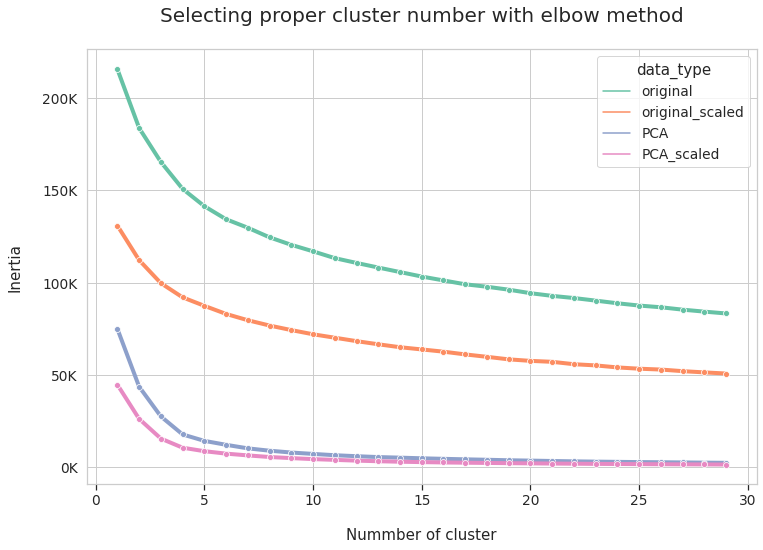

In [ ]:
fig = plt.figure(figsize=(12,8))
g = sns.lineplot(data=result,x='K',y='Inertia',hue='data_type',linewidth=4,marker='o')
g.set_xlabel('Number of cluster', labelpad = 20)
g.set_ylabel('Inertia', labelpad = 20)
g.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
g.tick_params(which="both", bottom=True)
g.set_title('Selecting proper cluster number with elbow method',y=1.05, fontsize=20);

In [ ]:
pca.explained_variance_ratio_.sum()

0.3420590178212105

In [ ]:
pca = PCA(n_components = 2,random_state=42)
df_PCA_scaled = pca.fit_transform(df_scaled)

model = KMeans(n_clusters=4,random_state=42)
model.fit(df_PCA_scaled)
cluster = model.labels_

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


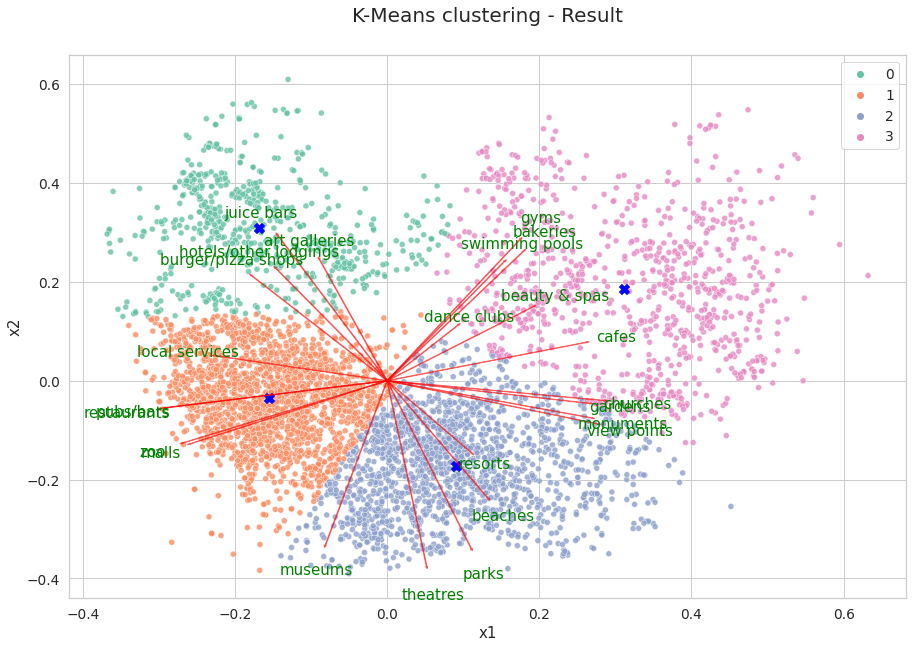

In [ ]:
coeff = np.transpose(pca.components_[0:2, :])
n = coeff.shape[0]
labels = list(df.columns)


xs = df_PCA_scaled[:,0]
ys = df_PCA_scaled[:,1]
scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())

fig = plt.figure(figsize=(15,10))

#scatter plot of each data point
g = sns.scatterplot(xs * scalex,ys * scaley,hue=cluster,palette='Set2',alpha=0.8)

#add cluster centroid
plt.scatter(x=model.cluster_centers_[:,0]*scalex, y=model.cluster_centers_[:,1]*scaley, color='b',s=100,marker='X')

#add EigenVector representing how each attraction categories related to x1 and x2
for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
        
        
g.set_xlabel("x{}".format(1))
g.set_ylabel("x{}".format(2))
g.set_title('K-Means clustering - Result',y=1.05, fontsize=20);
plt.savefig('Clustering Result.png')

<function matplotlib.pyplot.savefig>

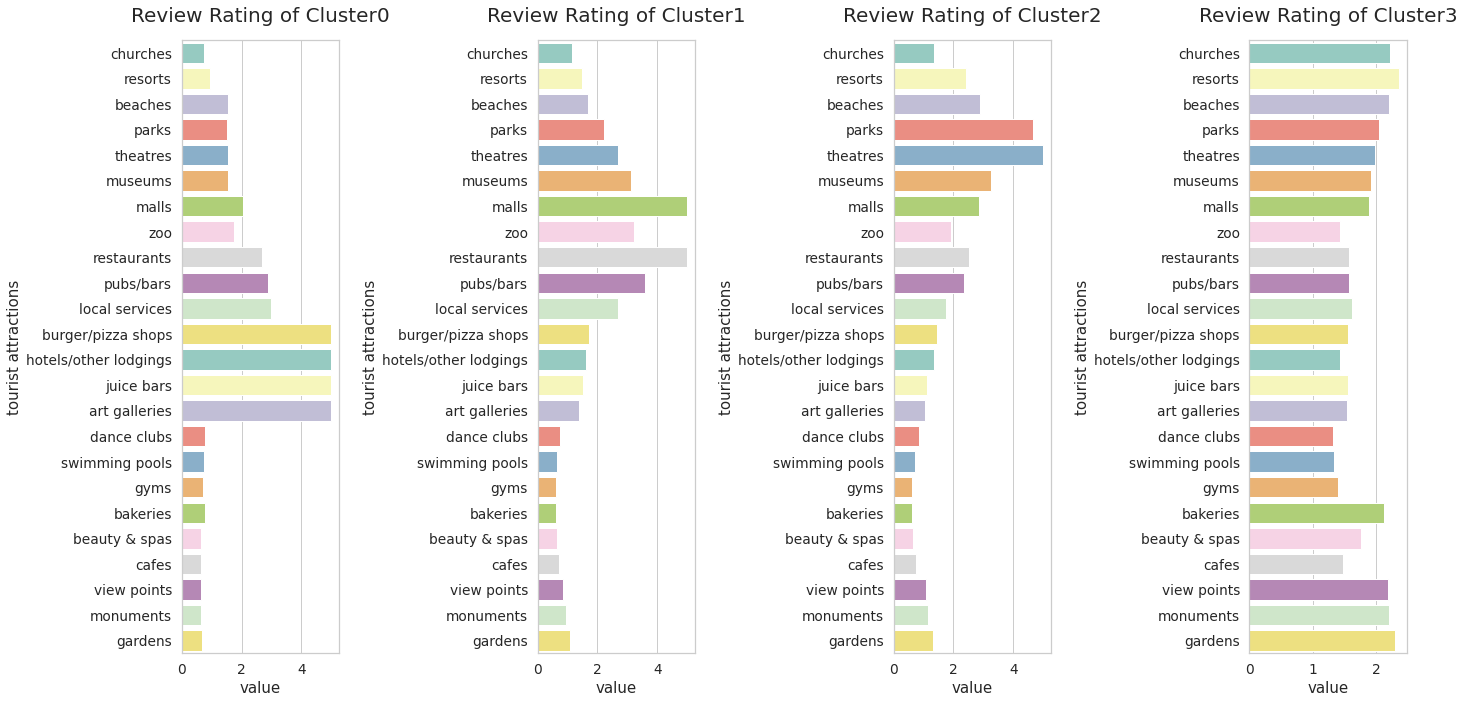

In [ ]:
df['cluster'] = model.labels_
df_long = pd.melt(df, "cluster", var_name="tourist attractions")

fig = plt.figure(figsize = (20,10))
for i in range(len(df_long.cluster.unique())):
    plt.subplot(1,len(df_long.cluster.unique()),i+1)
    g = sns.barplot(y='tourist attractions',x='value',data=df_long[df_long['cluster']==i],palette='Set3',ci=None,estimator=np.median)
    g.set_title(f'Review Rating of Cluster{i}',y=1.02,fontsize=20)
fig.tight_layout(pad=1.08)
plt.savefig